In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Instructions

# Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.


**1. Import the data from medical_examination.csv and assign it to the df variable.**

In [2]:
df = pd.read_csv('/kaggle/input/dataset/medical_examination.csv')

In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**2. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.**

In [6]:
def overweight(row):
    if (row['weight']/((row['height']/100)**2) > 25): return 1
    return 0

df['overweight'] = df.apply(overweight, axis=1)
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1


**3. Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.**

In [7]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head(2)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1


**4. Draw the Categorical Plot in the draw_cat_plot function.**

**5. Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.**

**6. Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.**

**7. Convert the data into long format and create a chart that shows the value counts of the categorical features using the following method provided by the seaborn library import: sns.catplot().**

**8. Get the figure for the output and store it in the fig variable.**

**9. Do not modify the next two lines.**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


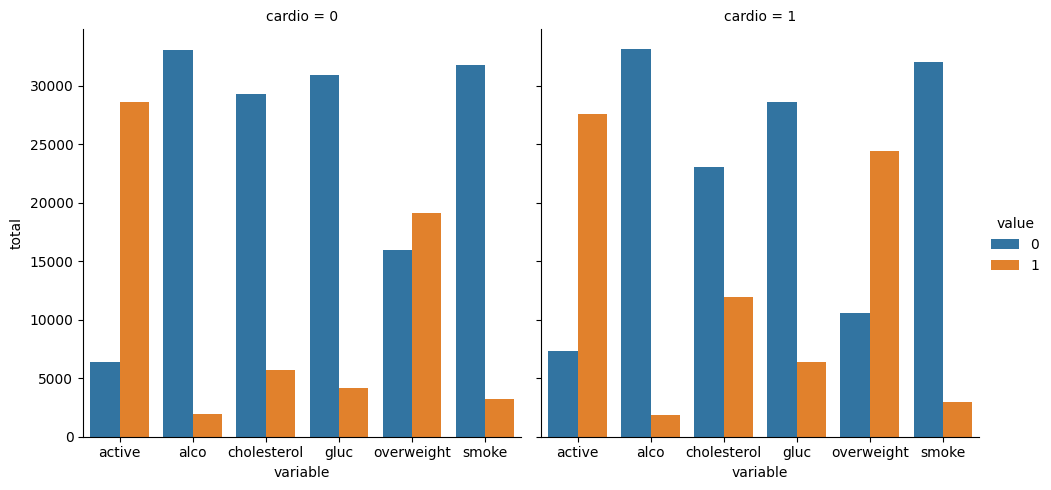

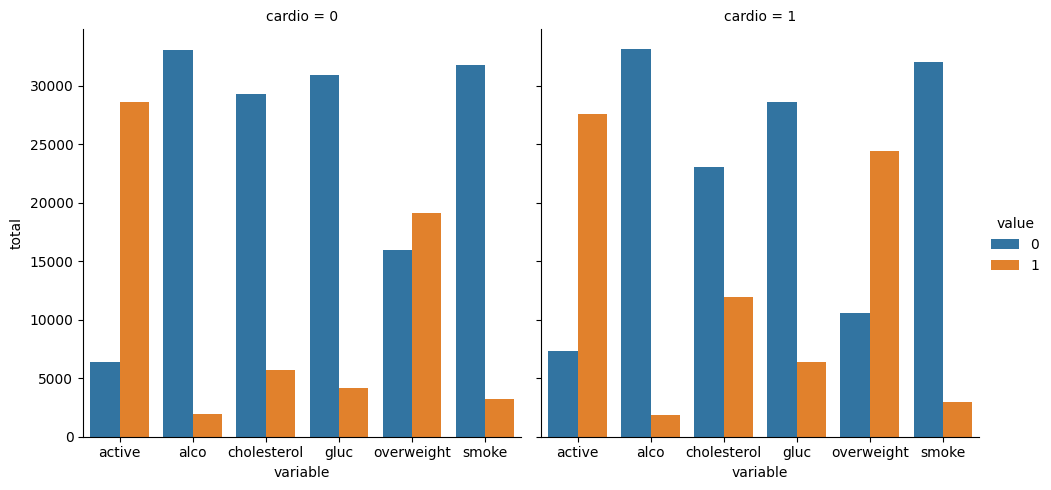

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# instruction 4
def draw_cat_plot():
    # instruction 5
    df_cat = pd.melt(df, id_vars=['cardio'], 
             value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    # instruction 6
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
    
    # instruction 7 & 8
    fig = sns.catplot(x="variable", y="total", hue="value", col="cardio",
                      data=df_cat, kind="bar").fig
    # instruction 9
    fig.savefig('catplot.png')
    return fig

draw_cat_plot()

**10. Draw the Heat Map in the draw_heat_map function.**

**11. Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:**

**1. diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))**

**2. height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))**

**3. height is more than the 97.5th percentile**

**4. weight is less than the 2.5th percentile**

**5. weight is more than the 97.5th percentile**

**12. Calculate the correlation matrix and store it in the corr variable.**

**13. Generate a mask for the upper triangle and store it in the mask variable.**

**14. Set up the matplotlib figure.**

**15. Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().**

**15. Do not modify the next two lines.**

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


(<Figure size 1200x800 with 2 Axes>, <Axes: >)

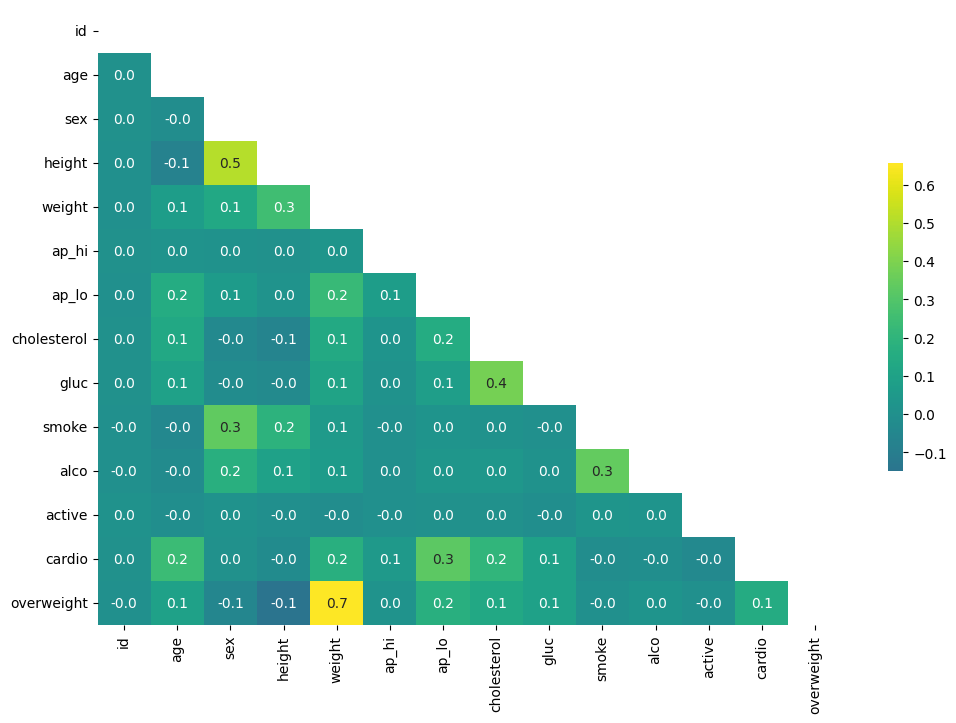

In [23]:
# Instruction 10
def draw_heat_map():
    # Instruction 11
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]
    # Instruction 12
    corr = df_heat.corr()

    # Instruction 13
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Instruction 14 & 15
    fig, ax = plt.subplots(figsize=(12, 8)), sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", center=0, cmap="viridis", cbar_kws={"shrink": 0.5})

    # Instruction 16
    # fig.savefig('heatmap.png')
    return fig

draw_heat_map()